## ¿Por que estan dificil saber quien va a ir a Votar?
##Hay dos motivos muy humanos para explicarlo: que las personas somos optimistas en exceso y que nos gusta quedar bien

## https://elpais.com/politica/2019/04/07/actualidad/1554639446_309283.html

## Como complemento al trabajo realizado hasta ahora y de cara a posibles mejoras en los modelos aplicados hasta ahora, voy a hacer una exploracion del Dataset (2009) para comprobar la correlacion entre las variables y ver si puede aplicar un analisis de componentes para reducir dimensionalidad de cara a trabajar con mayor volumen de datos. 

##Importamos las librerias necesarias para utilizar un matriz heatmap de la libreria seaborn (comprobacion de la corrlacion entre las variabes) y hacer una PCA con la libreria SKLearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
pd.options.display.max_columns=None
df = pd.read_csv('../TFM/1_Data/GDataframe_2009.csv')
df_analisis = df.drop(['Unnamed: 0', 'Código municipio','Municipio', '2011_elecc', '2011_partic'], axis=1)
df_analisis.head()

,2009_1,2009_2,2009_3,2009_4,2010_5,2009_6,2009_7,2009_8,2009_9,2009_10,2009_11,2009_12,2011_13,2009_14,2009_15,2009_16,2001_18,2009_18,2009_19,2009_20,2005_21,2005_22,2009_23,2009_24,2005_25,2011_26,2009_27,2009_28,2009_29,2009_30,2009_31,2012,2009_33,2009_34,2009_35,2009_36,2009_37,2009_38,2009_39,2009_40,2009_41,2009_42,2010_43,2010_44,2010_45,2011_46,2009_47,2009_48,2011_49,2009_50,2009_51,2009_52,2005_53,2005,2006_55,2009_56,2009_57,2009_58,2006_59,2007,2009_61,2001_62,2010,2009_64
0,43.75,8.65,0.0,185.36,33.4,0.00,4.55,0.00,2.0,96.44,0.00,6.04,145.52,11.71,7.30,201.11,"88,98",23.68,2.74,2.75,212.71,44.28,100.00,3.41,43.85,73.8,49.69,46.73,13.71,16.76,19.97,4.83,63.27,6.06,13.95,289.99,10.94,1.38,0.73,20.38,9.44,0.00,19.51,56.11,16.89,94.05,4.16,7260.0,66.02,0.55,4.55,2.41,1.16,55.01,90.64,8.75,10.40,12.90,0.88,12.94,5.86,11.24,7.60,8.50
1,25.00,0.00,0.0,269.94,37.6,0.00,0.00,0.00,3.0,96.71,0.00,3.12,154.65,0.00,0.00,28.21,"100,00",32.14,0.00,0.00,261.93,49.18,0.00,7.69,52.75,71.6,43.61,69.89,18.35,16.67,4.17,35.00,79.17,15.82,18.67,585.88,0.00,0.00,0.90,12.27,0.00,0.00,14.75,43.53,11.51,100.00,1.90,316.0,74.44,0.00,9.49,0.26,0.18,50.36,110.75,103.45,92.02,18.69,6.53,10.73,20.61,31.40,22.98,14.93
2,30.77,9.60,0.0,250.51,37.0,0.00,2.63,9.77,3.0,98.08,0.00,0.41,184.19,9.12,4.56,595.49,"94,70",23.48,3.09,3.11,480.39,92.71,88.17,3.40,42.44,67.2,47.90,51.52,15.68,21.74,13.04,2.39,65.22,6.22,13.99,240.10,7.20,1.04,0.76,4.52,0.00,61.39,20.98,55.96,16.29,84.89,1.63,9647.0,80.36,1.34,0.00,10.19,2.16,38.46,76.86,8.60,14.60,9.29,0.82,8.60,8.15,10.63,21.09,18.13
3,80.00,36.14,0.0,326.34,23.4,46.62,17.99,0.00,1.0,96.71,0.00,-2.41,294.39,2.49,4.99,57.29,"100,00",32.30,0.00,0.00,301.70,39.12,0.00,5.00,52.75,66.1,91.57,55.43,14.46,16.53,26.45,6.56,57.02,17.46,19.20,-900.80,0.00,0.00,1.79,9.32,0.00,0.00,16.31,53.21,17.38,100.00,2.99,401.0,81.70,2.33,17.46,4.54,3.71,66.71,108.36,5.03,37.30,12.05,1.59,8.34,29.35,14.69,8.29,24.10
4,33.33,15.63,0.0,114.60,28.5,0.00,5.03,4.98,3.0,98.90,27.75,4.03,156.28,3.06,3.06,34.96,"98,11",38.45,4.98,5.11,331.52,64.61,83.33,4.82,28.60,73.4,43.87,59.58,15.63,21.78,26.22,32.07,52.00,16.85,17.06,219.79,4.98,0.00,0.72,365.22,0.00,59.41,13.06,51.44,16.77,100.00,4.90,1958.0,75.42,0.50,10.73,0.79,0.73,51.96,109.75,4.49,9.97,15.63,3.98,20.39,17.74,17.67,11.07,14.97


## Voy a definir una funcion que utiliza la libreria Seaborn para mostrar un mapa de calor sobre la correlacion entre variables, es una funcion que he encontrado en la red, bastante sencilla de entender y aplicar.

In [59]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(30, 30))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

In [3]:
df_analisis.corr()[7:15]

,2009_1,2009_2,2009_3,2009_4,2010_5,2009_6,2009_7,2009_8,2009_9,2009_10,2009_11,2009_12,2011_13,2009_14,2009_15,2009_16,2001_17,2009_18,2009_19,2009_20,2005_21,2005_22,2009_23,2009_24,2005_25,2011_26,2009_27,2009_28,2009_29,2009_30,2009_31,2012,2009_33,2009_34,2009_35,2009_36,2009_37,2009_38,2009_39,2009_40,2009_41,2009_42,2010_43,2010_44,2010_45,2011_46,2009_47,2009_48,2011_49,2009_50,2009_51,2009_52,2005_53,2005,2006_55,2009_56,2009_57,2009_58,2006_59,2007,2009_61,2001_62,2010,2009_64
2009_8,0.083979,0.097218,-0.044882,0.055173,0.087918,0.142475,0.042103,1.000000,0.091167,-0.014667,-0.094319,-0.094640,-0.069743,-0.218567,-0.220552,-0.105125,0.176182,0.011410,-0.104361,-0.020105,0.071733,0.227956,-0.126809,0.081197,-0.001906,-0.127833,-0.036679,0.163552,0.069333,0.001732,0.113178,0.126374,-0.115517,0.217510,0.074111,0.073414,-0.050025,-0.129296,0.079008,0.169136,-0.005990,-0.103688,0.158661,-0.027088,-0.071939,0.126618,-0.134734,-0.081275,0.085101,-0.064484,-0.049887,-0.130088,0.000085,0.170889,0.146950,-0.022901,0.045933,-0.035468,0.179444,0.056634,0.071546,0.243099,0.087372,0.204073
2009_9,-0.065773,-0.156652,0.051185,-0.175299,-0.127631,-0.230253,-0.109486,0.091167,1.000000,0.035359,0.144597,-0.090668,-0.048918,0.277149,0.260511,0.173882,-0.259743,-0.202698,0.013952,0.027895,-0.160456,0.151196,0.152576,0.031416,-0.219732,0.225577,0.080913,-0.055385,-0.043898,-0.039882,-0.117130,-0.364171,0.144369,-0.084649,-0.044276,0.037241,-0.041400,0.257542,-0.150476,0.057704,-0.149582,-0.030053,-0.015258,0.233378,0.199310,-0.212106,0.078830,0.139156,-0.092853,-0.103639,-0.048231,0.208217,-0.276668,0.065413,-0.225357,0.048304,-0.090125,-0.126426,-0.009195,-0.221304,-0.122518,-0.126164,-0.136946,-0.125392
2009_10,0.082956,0.016114,0.055676,0.165192,0.096406,-0.264010,-0.085794,-0.014667,0.035359,1.000000,0.057878,-0.165193,0.229511,-0.022195,-0.039041,0.014660,0.040270,0.094804,0.055230,0.049110,0.073798,-0.249406,0.161093,-0.269318,0.154754,0.039830,0.144699,-0.064049,0.096407,-0.051136,0.022947,0.017596,0.010079,0.035781,-0.187089,-0.059143,0.164930,0.012796,-0.084593,0.061042,0.075454,0.173207,0.087522,0.196103,0.138288,-0.017852,0.048625,0.025905,-0.055075,-0.013136,-0.023253,0.054899,0.248834,-0.282011,-0.106398,0.041066,0.100729,-0.199827,0.168144,0.342959,0.088023,-0.394529,0.128988,0.084913
2009_11,-0.014753,-0.101924,-0.009900,-0.088909,-0.111541,-0.090867,-0.029800,-0.094319,0.144597,0.057878,1.000000,0.034070,0.012255,0.104792,0.062813,0.036202,-0.123564,-0.131382,-0.001539,-0.013492,0.021641,-0.024429,0.151240,-0.023613,0.004481,0.174763,0.017064,-0.104800,-0.064187,0.012203,-0.016398,-0.142020,0.008631,-0.084591,-0.018358,0.027920,0.076711,0.091188,-0.108754,-0.044785,-0.006208,0.069838,0.024505,0.055332,0.019683,-0.129887,0.098065,0.063334,-0.085970,-0.043569,0.065870,0.077414,-0.022888,-0.060637,-0.187362,-0.033177,-0.022297,-0.058320,-0.072146,-0.071845,-0.014511,-0.095373,-0.057728,-0.095251
2009_12,0.028848,0.040185,0.027962,-0.150908,-0.418914,0.244333,-0.026948,-0.094640,-0.090668,-0.165193,0.034070,1.000000,-0.122457,0.009989,0.021343,-0.038973,-0.109571,-0.040480,-0.164801,-0.076149,-0.258427,0.147023,-0.050072,0.053952,-0.218568,0.219274,-0.134201,-0.313246,-0.562213,-0.001562,-0.031950,-0.079790,0.033308,-0.030501,0.506542,0.010733,-0.136207,0.124641,-0.081802,-0.041030,-0.044804,-0.199282,0.085759,0.090127,0.020017,0.004834,-0.018521,-0.028714,0.126668,-0.030020,-0.121523,-0.013354,-0.105743,0.079936,-0.029371,-0.073582,-0.045639,0.759512,-0.281497,-0.266055,0.375364,0.244572,-0.370412,-0.287909
2011_13,0.115878,0.009284,0.059889,0.339549,0.167144,-0.030726,0.020934,-0.069743,-0.048918,0.229511,0.012255,-0.122457,1.000000,-0.027261,-0.017531,-0.084140,0.198711,0.071743,0.030536,0.117024,0.226021,-0.155477,-0.046476,-0.003955,0.159575,-0.096372,0.095915,0.208879,0.273626,-0.105203,0.193530,0.232738,-0.127188,0.061319,-0.222107,-0.014068,0.142193,-0.106910,0.191621,0.007066,0.035245,0.031714,-0.085470,-0.236103,-0.

## Como podeis comprobar a simple vistazo la correlacion entre los 64 predictores no es especialmente alta en general (mas colores claritos que oscuros) pero puede ser suficiente para hacer un analisis de componentes, entendiendo que siguen una distribucion normal o gaussiana en su mayoria.

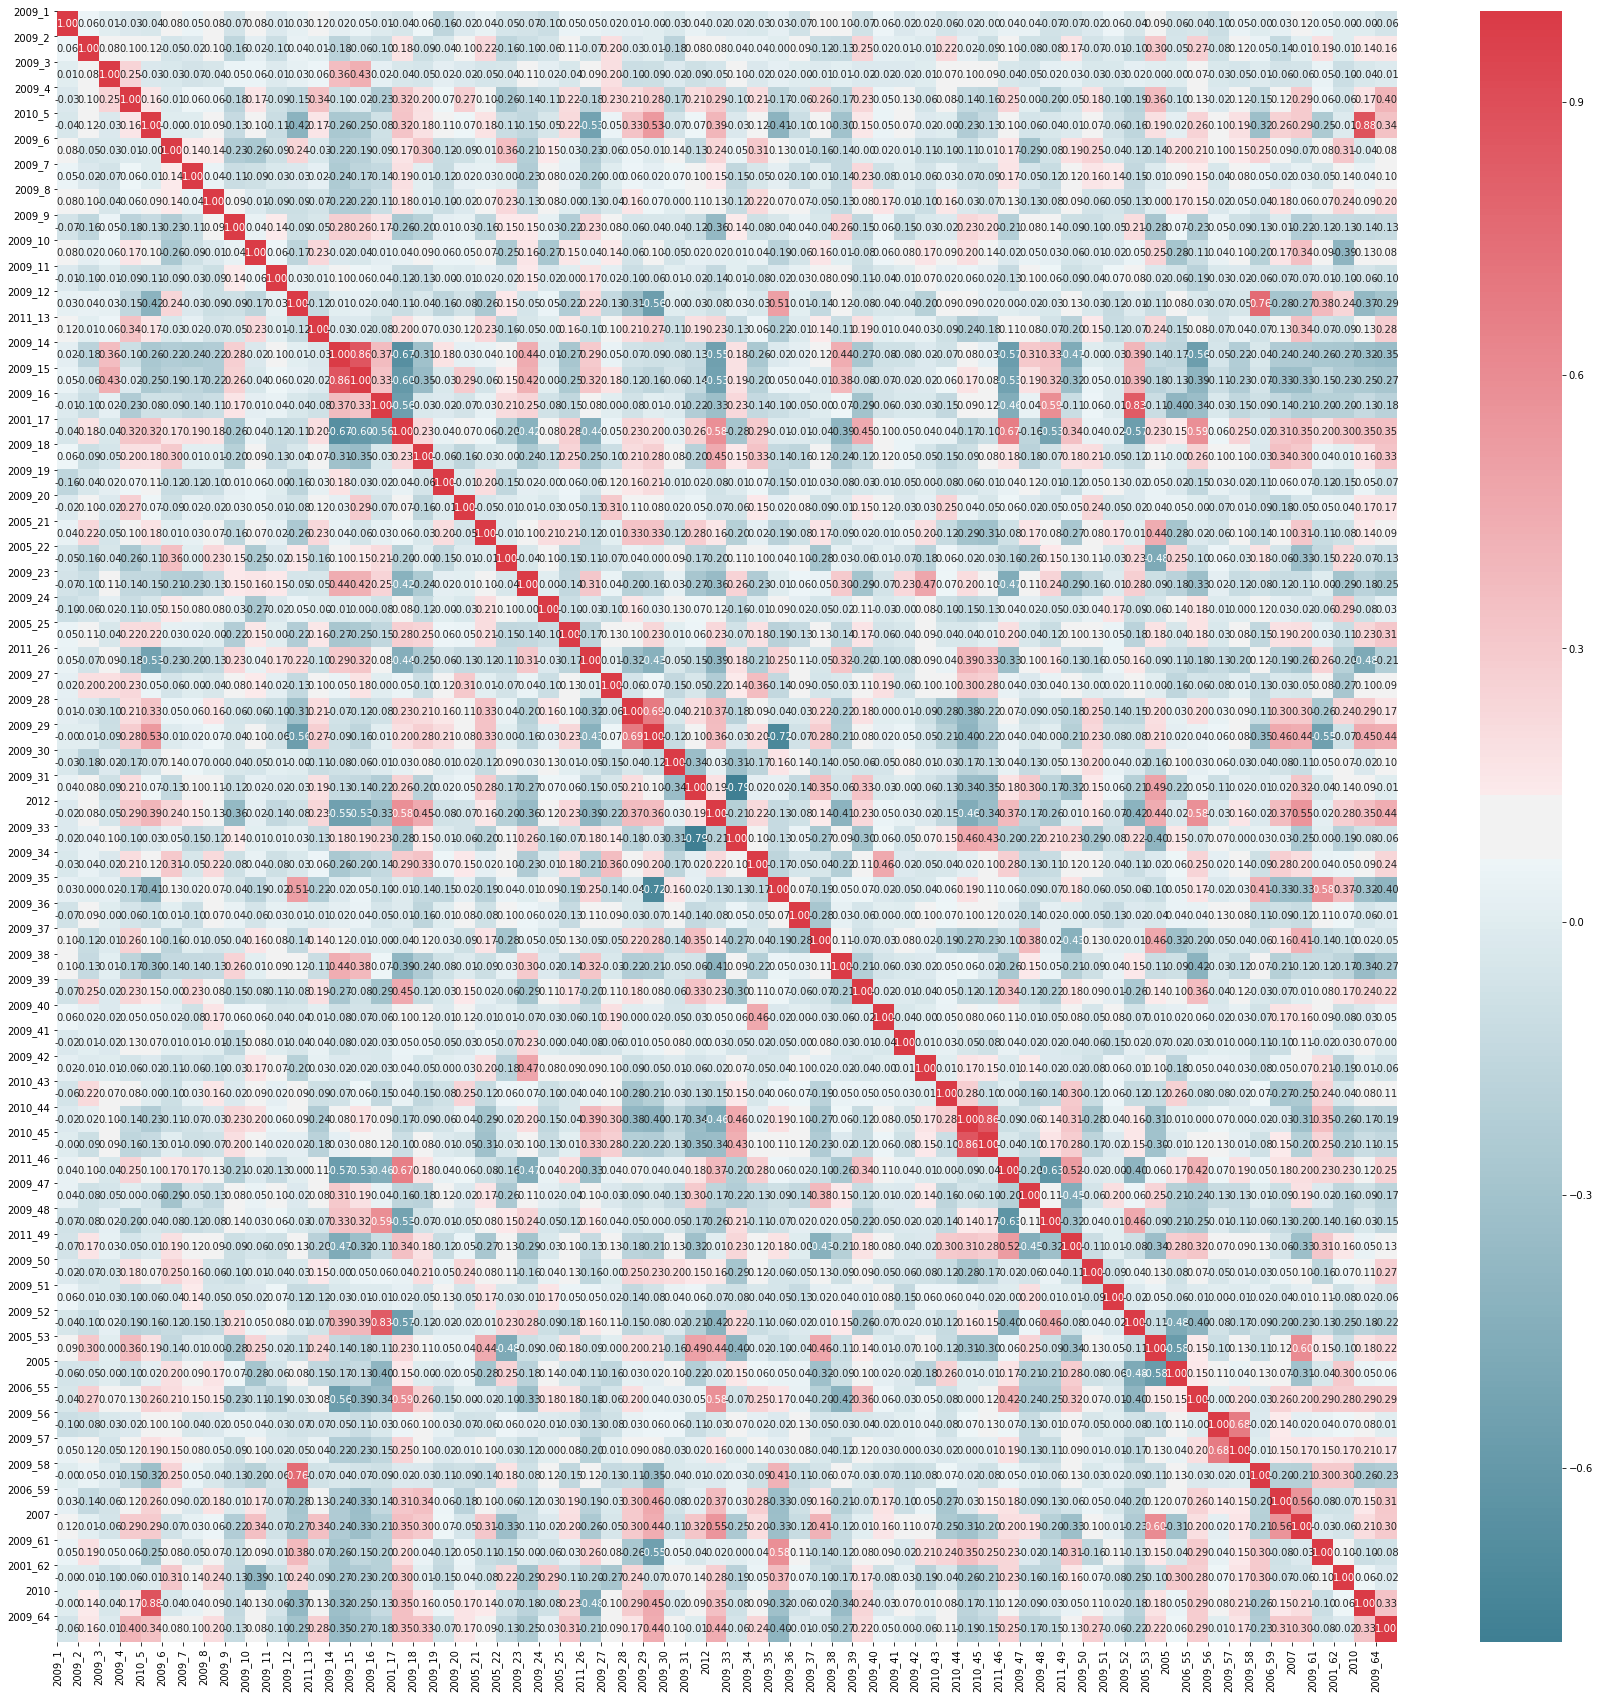

In [60]:
heatMap(df_analisis)

## Empezemos con el analisis de componentes o PCA

In [4]:
df_clasif = df[['2011_partic']]

In [19]:
df_clasif.head()

,2011_partic
0,2
1,2
2,2
3,1
4,2


## Al igual que en el modelado debemos normalizar los datos antes

In [20]:
X_std = StandardScaler().fit_transform(df_analisis)

In [21]:
y = df_clasif.values

## Imprimos una matriz de las covarianzas

In [22]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00409836  0.05826952  0.00506711 ... -0.00187894 -0.00382536
  -0.06128986]
 [ 0.05826952  1.00409836  0.07596565 ... -0.00705432  0.14382842
   0.15895067]
 [ 0.00506711  0.07596565  1.00409836 ... -0.10373763 -0.04142443
  -0.0111234 ]
 ...
 [-0.00187894 -0.00705432 -0.10373763 ...  1.00409836  0.06472941
  -0.01884054]
 [-0.00382536  0.14382842 -0.04142443 ...  0.06472941  1.00409836
   0.33390365]
 [-0.06128986  0.15895067 -0.0111234  ... -0.01884054  0.33390365
   1.00409836]]


## Imprimos los vectores y valores

In [23]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.00643267  0.02107141  0.0386129  ...  0.04741143  0.04835219
   0.0020153 ]
 [-0.0628359  -0.03783397 -0.01552265 ... -0.22341612 -0.11912199
  -0.15978762]
 [ 0.0458674   0.01398189 -0.05347796 ... -0.01982976  0.08805301
   0.01863987]
 ...
 [-0.08832486 -0.18180231  0.19439194 ... -0.13051484  0.00810779
  -0.06145527]
 [-0.17797085  0.07234603 -0.15104672 ... -0.01259634  0.01906289
  -0.09505333]
 [-0.18785599  0.03442259 -0.14322956 ... -0.01768221 -0.32042881
   0.21724997]]

Eigenvalues 
[9.09378367e+00 5.87108774e+00 3.98300867e+00 3.56516196e+00
 2.66131215e+00 2.22524532e+00 2.03649356e+00 1.86941008e+00
 1.81216139e+00 1.67175043e+00 1.59328450e+00 1.55624526e+00
 1.51950279e+00 1.33073050e+00 1.26413543e+00 1.21845253e+00
 1.19009993e+00 1.12029733e+00 1.06721689e+00 1.00431618e+00
 9.80599434e-01 9.21488873e-01 9.09356080e-01 8.51562141e-01
 7.87545254e-01 7.74463215e-01 7.21536839e-01 6.62102662e-01
 6.33419335e-01 6.21424213e-01 5.99841760e-01 5.47611

## Ordenamos los autovalores

In [24]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
9.093783670336968
5.8710877428256305
3.9830086698736586
3.565161956445605
2.6613121503580626
2.225245322465651
2.0364935597902623
1.8694100796398225
1.812161390680685
1.6717504258971438
1.5932845024313014
1.556245256626364
1.5195027902729232
1.3307305005091803
1.264135433794883
1.2184525325638997
1.1900999346938932
1.1202973327429473
1.067216886104665
1.0043161760120978
0.980599433845564
0.9214888732386115
0.9093560798188643
0.8515621405026482
0.7875452544842307
0.7744632153988121
0.721536839455154
0.6621026623082081
0.6334193354999399
0.6214242125080275
0.5998417603028143
0.5476118519707697
0.5315985308017075
0.5202282696189535
0.4710962814582817
0.450565607254126
0.4448874248311564
0.4187645803354818
0.39378958922801416
0.3674438659310457
0.3656236806387198
0.34024957250152116
0.31988629545706054
0.28979345626453784
0.27031263278926565
0.24842192396946067
0.23332316067444916
0.22682793071870544
0.1982958177500688
0.1977458766854458
0.176604863222571

## Y ahora si, ploteamos como afectan los 8 componentes principales (hemos reducido las dimensionalidad de 64 a 8) a la varianza explicada acumulada, viendo que practicamente podemos explicarla en su 100% con estos 8 componentes principales 

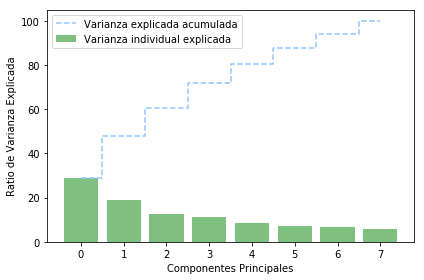

In [25]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals[0:8])
var_exp = [(i / tot)*100 for i in sorted(eig_vals[0:8], reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(8), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(8), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

## Solo añadir que esta parte requiere un analisis mas profundo y conocimientos matematicos de algebra lineal por mi parte, que ire revisando mas adelante